In [303]:
# Import the modules
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [304]:
# Read csv
transaction_cleaned = pd.read_csv('/Users/mac/Project-2/transaction_cleaned.csv')
transaction_cleaned

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,NaN,NaN,100.0,166.0,542.0,144.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,166.0,621.0,500.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.0,0.0,100.0,121.0,410.0,142.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,225.0,176.0,507.0,0,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.0,0.0,100.0,166.0,529.0,575.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.0,-3.0,100.0,166.0,352.0,222.0,0,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.0,-13.0,100.0,166.0,263.0,222.0,0,...,False,False,False,False,False,False,False,False,False,False


In [305]:
# Check df with NaN filled with mean
df_mean = transaction_cleaned.fillna(transaction_cleaned.mean())
df_mean

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,1.941549,-5.952324,100.0,166.0,542.0,144.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.000000,-5.000000,100.0,166.0,621.0,500.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.000000,0.000000,100.0,121.0,410.0,142.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.000000,-6.000000,100.0,225.0,176.0,507.0,0,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.000000,0.000000,100.0,166.0,529.0,575.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.000000,-3.000000,100.0,166.0,352.0,222.0,0,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.000000,0.000000,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.000000,0.000000,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.000000,-13.000000,100.0,166.0,263.0,222.0,0,...,False,False,False,False,False,False,False,False,False,False


In [306]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(225), int64(4)
memory usage: 60.4 MB


In [307]:
df_med = transaction_cleaned.fillna(transaction_cleaned.median())
df_med

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,0.0,0.0,100.0,166.0,542.0,144.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,166.0,621.0,500.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.0,0.0,100.0,121.0,410.0,142.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,225.0,176.0,507.0,0,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.0,0.0,100.0,166.0,529.0,575.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.0,-3.0,100.0,166.0,352.0,222.0,0,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.0,-13.0,100.0,166.0,263.0,222.0,0,...,False,False,False,False,False,False,False,False,False,False


In [308]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(225), int64(4)
memory usage: 60.4 MB


In [309]:
#Review data 
df_mean.dtypes

TransactionID                   int64
id_01                         float64
id_02                         float64
id_05                         float64
id_06                         float64
                               ...   
R_emaildomain_yahoo.com.mx       bool
R_emaildomain_yahoo.de           bool
R_emaildomain_yahoo.es           bool
R_emaildomain_yahoo.fr           bool
R_emaildomain_ymail.com          bool
Length: 508, dtype: object

In [310]:
X = df_mean.drop(columns=('isFraud'))
X

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,TransactionDT,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,1.941549,-5.952324,100.0,166.0,542.0,144.0,86506,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.000000,-5.000000,100.0,166.0,621.0,500.0,86535,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.000000,0.000000,100.0,121.0,410.0,142.0,86549,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.000000,-6.000000,100.0,225.0,176.0,507.0,86555,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.000000,0.000000,100.0,166.0,529.0,575.0,86620,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.000000,-3.000000,100.0,166.0,352.0,222.0,1714130,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.000000,0.000000,100.0,166.0,312.0,214.0,1714143,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.000000,0.000000,100.0,166.0,312.0,214.0,1714171,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.000000,-13.000000,100.0,166.0,263.0,222.0,1714197,...,False,False,False,False,False,False,False,False,False,False


In [311]:
# Define target variable 
y = df_mean['isFraud']
y

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: isFraud, Length: 30000, dtype: int64

In [312]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [313]:


# Apply train_test_split to data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [314]:
# Display X_train
X_train

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,TransactionDT,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
26340,3058857,-10.0,101528.0,0.0,0.0,100.0,225.0,607.0,561.0,1614571,...,False,False,False,False,False,True,False,False,False,False
3877,3003670,-5.0,155753.0,3.0,-15.0,100.0,166.0,352.0,549.0,439467,...,False,False,False,False,False,False,False,False,False,False
27081,3060191,-5.0,112419.0,0.0,0.0,100.0,225.0,427.0,595.0,1626380,...,False,False,False,False,False,False,False,False,False,False
5440,3008642,-5.0,32818.0,17.0,-26.0,100.0,166.0,337.0,214.0,573478,...,False,False,False,False,False,False,False,False,False,False
22164,3050162,-5.0,149155.0,0.0,0.0,100.0,225.0,266.0,507.0,1442481,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,3039159,-5.0,51460.0,0.0,0.0,100.0,166.0,410.0,484.0,1217601,...,False,False,False,False,False,False,False,False,False,False
5192,3007951,0.0,143975.0,0.0,0.0,100.0,225.0,266.0,305.0,533254,...,False,False,False,False,False,False,False,False,False,False
12172,3026801,-5.0,25811.0,0.0,0.0,100.0,166.0,312.0,222.0,965018,...,False,False,False,False,False,False,False,False,False,False
235,2987779,-5.0,4235.0,0.0,0.0,100.0,166.0,397.0,161.0,102154,...,False,False,False,False,False,False,False,False,False,False


In [315]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(225), int64(4)
memory usage: 60.4 MB


In [316]:
nan_data = X_train.isnull().sum()
print(nan_data)

TransactionID                 0
id_01                         0
id_02                         0
id_05                         0
id_06                         0
                             ..
R_emaildomain_yahoo.com.mx    0
R_emaildomain_yahoo.de        0
R_emaildomain_yahoo.es        0
R_emaildomain_yahoo.fr        0
R_emaildomain_ymail.com       0
Length: 507, dtype: int64


In [317]:
#Display X_test
X_test

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,TransactionDT,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
10747,3023360,-5.0,107315.0,10.0,-100.0,100.000000,166.0,122.0,597.0,884102,...,False,False,False,False,False,False,False,False,False,False
12573,3027744,-5.0,115929.0,1.0,0.0,95.699997,166.0,100.0,500.0,1007838,...,False,False,False,False,False,False,False,False,False,False
29676,3065336,-5.0,999074.0,14.0,-3.0,100.000000,166.0,410.0,489.0,1708553,...,False,False,False,False,True,False,False,False,False,False
8856,3018476,-5.0,491439.0,6.0,-1.0,100.000000,166.0,621.0,394.0,776038,...,False,False,False,False,False,False,False,False,False,False
21098,3047848,-5.0,270660.0,5.0,0.0,100.000000,166.0,410.0,222.0,1379465,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29317,3064677,-5.0,61467.0,0.0,-6.0,100.000000,166.0,193.0,535.0,1702722,...,False,False,False,False,False,False,False,False,False,False
18629,3042169,-5.0,163791.0,0.0,0.0,100.000000,225.0,290.0,401.0,1285211,...,False,False,False,False,False,False,False,False,False,False
15329,3034394,-10.0,119772.0,0.0,-8.0,100.000000,202.0,410.0,435.0,1122690,...,False,False,False,False,False,False,False,False,False,False
14587,3032586,0.0,89899.0,0.0,0.0,100.000000,166.0,542.0,333.0,1099280,...,False,False,False,False,False,False,False,False,False,False


In [318]:
# Check the number of fraud vs. not fraud('isFraud')
# using value_counts
df_mean['isFraud'].value_counts()

isFraud
0    28869
1     1131
Name: count, dtype: int64

In [319]:
# Calculate value counts with percentages
value_counts = transaction_cleaned['isFraud'].value_counts(normalize=True) * 100
# Display the percentages
print(value_counts)

isFraud
0    96.23
1     3.77
Name: proportion, dtype: float64


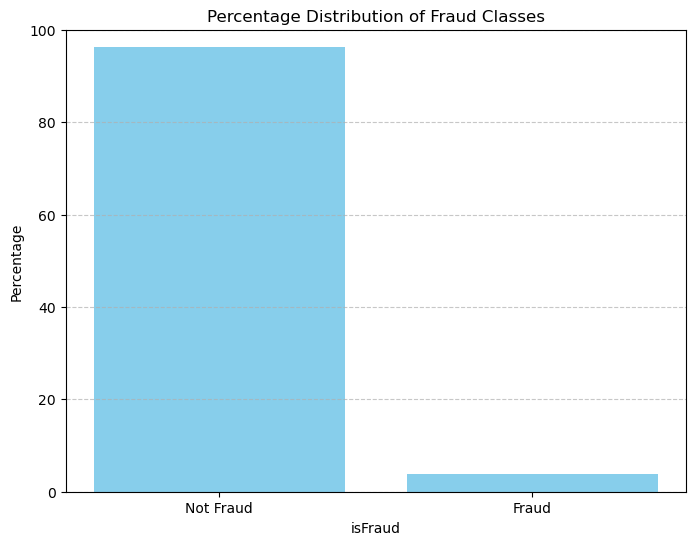

In [320]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index.astype(str), value_counts, color='skyblue')
plt.xlabel('isFraud')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Fraud Classes')
plt.xticks(ticks=value_counts.index.astype(str), labels=['Not Fraud', 'Fraud'])
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [339]:
# Scale data 
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a `LogisticRegression` function to lr_model 
lr_model = LogisticRegression()

In [ ]:
# fit train data to LogisticRegression model
lr_model.fit(X_train_scaled, y_train)


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Print the logistic regression Train and Test
print(f"Logistic Regression Training data :{lr_model.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Testing data :{lr_model.score(X_test_scaled, y_test)}")

Logistic Regression Training data :0.9623555555555555
Logistic Regression Testing data :0.9632


In [ ]:
# Create Prediction based on the Logistic Regression model we fit
predictions = lr_model.predict(X_train_scaled)
# Convert and display predictions vs actual data to a DataFrame
fraud_results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
fraud_results_df

,Prediction,Actual
26340,0,0
3877,0,0
27081,0,0
5440,0,0
22164,0,0
...,...,...
17289,0,0
5192,0,0
12172,0,0
235,0,1


In [ ]:
# Predictions applied to testing data
test_predictions = lr_model.predict(X_test_scaled)

# Convert and display predictions vs actual data of test data to DF

fraud_test_result = pd.DataFrame({ "Test Predictions":test_predictions, "Actual": y_test})
fraud_test_result

,Test Predictions,Actual
10747,0,0
12573,0,0
29676,0,0
8856,0,1
21098,0,0
...,...,...
29317,0,0
18629,0,0
15329,0,0
14587,0,0


In [ ]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score




In [ ]:
# Calculate the model accuracy score using y_test and testing 
accuracy_score= accuracy_score(y_test, test_predictions)
print(f"Your accuracy score for the model is: {accuracy_score}")

Your accuracy score for the model is: 0.9632


In [ ]:
# Load imports for use of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Apply RandomForest classifier
forest = RandomForestClassifier(random_state=15, n_estimators=500).fit(X_train_scaled, y_train)

# evaluate the model
print(f'Training Score: {forest.score(X_train_scaled, y_train)}')
print(f'Testing Score: {forest.score(X_test_scaled, y_test)}')



Training Score: 1.0
Testing Score: 0.98


In [ ]:
# Randomforest prediction on X_test
y_pred_forest = forest.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7224
           1       0.08      0.38      0.13       276

    accuracy                           0.81      7500
   macro avg       0.53      0.60      0.51      7500
weighted avg       0.94      0.81      0.87      7500



In [ ]:
# Get the feature importance array
feature_importances = forest.feature_importances_

In [ ]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:50]

[(0.024496574503410817, 'C1'),
 (0.021619345003546432, 'TransactionID'),
 (0.02134272653058456, 'TransactionDT'),
 (0.02080242346161446, 'id_02'),
 (0.01920313683846904, 'TransactionAmt'),
 (0.01791944434240906, 'V259'),
 (0.017120814585030803, 'card1'),
 (0.01709810163841571, 'C11'),
 (0.016480210284945063, 'C13'),
 (0.015817993856975094, 'V189'),
 (0.015373823715033654, 'C12'),
 (0.015175868954098117, 'card2'),
 (0.015074604739177263, 'C14'),
 (0.014975932735279023, 'C2'),
 (0.014700979610589693, 'id_19'),
 (0.014269184017972723, 'id_20'),
 (0.01401487200394693, 'V201'),
 (0.013484438752515869, 'V258'),
 (0.012900678658801491, 'C6'),
 (0.012675891218985283, 'V245'),
 (0.012388168482352005, 'C8'),
 (0.011890815333395763, 'C7'),
 (0.011434747253730096, 'C4'),
 (0.011424589509433572, 'V188'),
 (0.011368982200167096, 'V200'),
 (0.011256940235682786, 'C10'),
 (0.011166663062482162, 'id_05'),
 (0.010662329620732465, 'id_01'),
 (0.009993438805543983, 'card5'),
 (0.009909807067155078, 'V244'

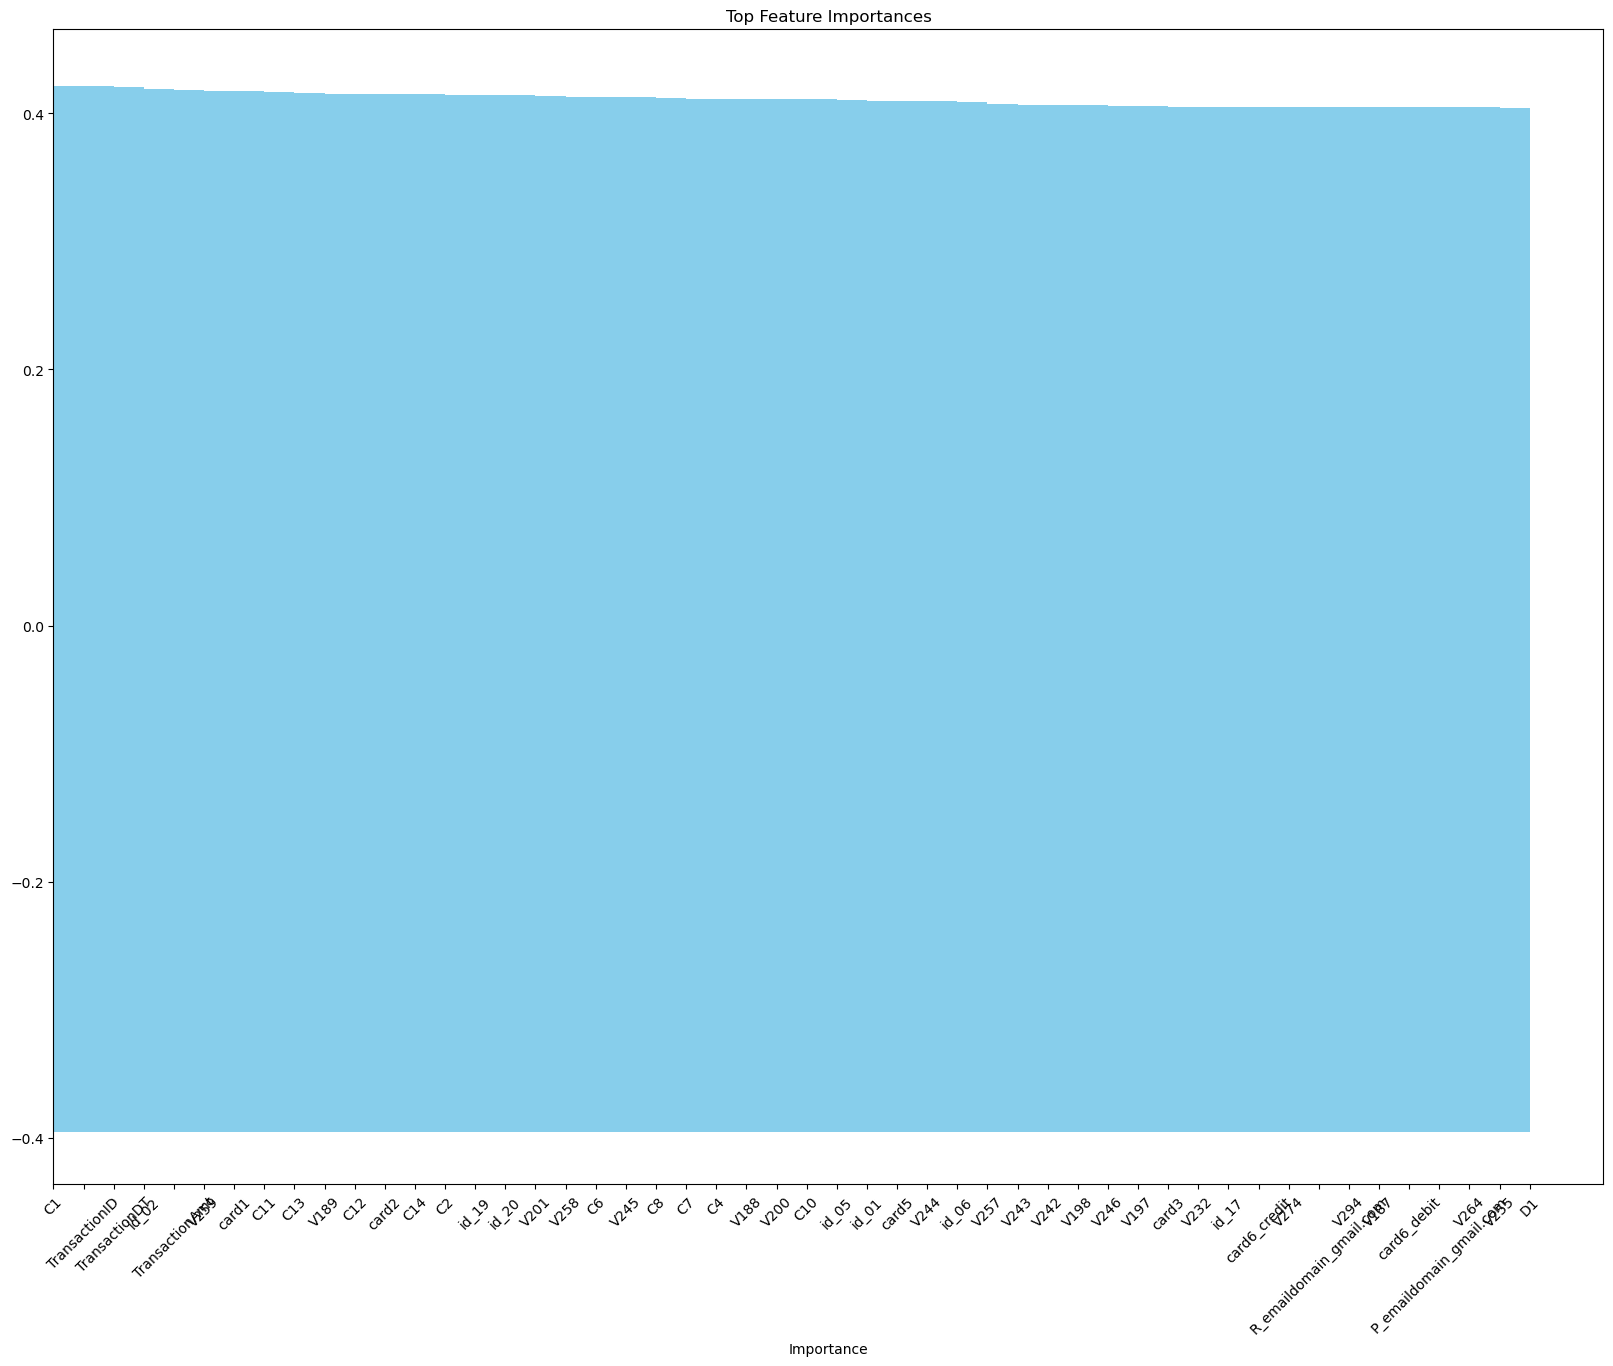

In [ ]:
import matplotlib.pyplot as plt



# Extract features and importances
top_features = importances_sorted[:50]
features, importances = zip(*top_features)  # Unpack tuples into two lists

# Create plot
fig, ax = plt.subplots(figsize=(20, 15))  # Set figure size
ax.barh(y=features, width=importances, color='skyblue')  # Create horizontal bar chart
plt.xticks(rotation=45)

# Adding labels and title
ax.set_xlabel('Importance')
ax.set_title('Top Feature Importances')

plt.show()


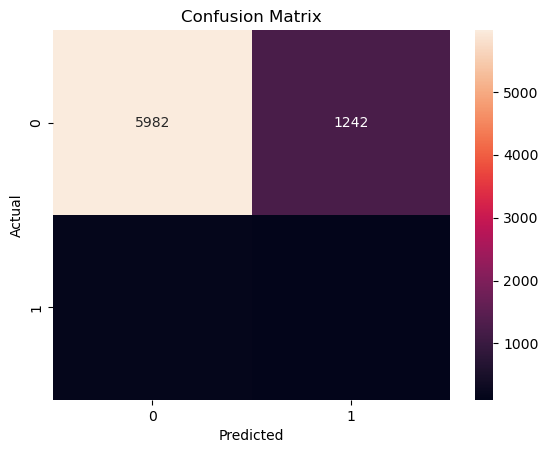

In [ ]:



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


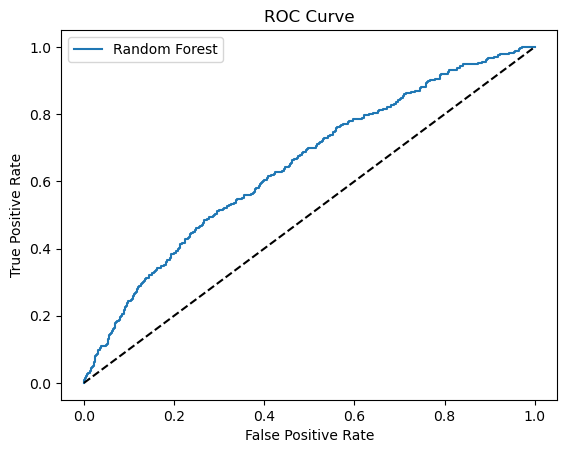

In [ ]:
 #ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=15), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [ ]:

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best ROC AUC Score: 0.9375321070057913


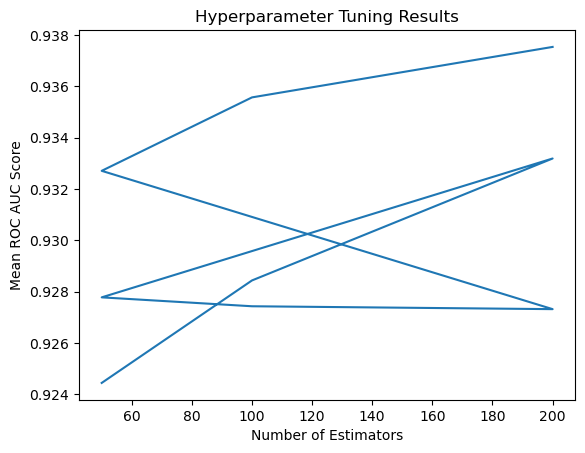

In [ ]:
# Line plot of ROC AUC scores
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_estimators'], results['mean_test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean ROC AUC Score')
plt.title('Hyperparameter Tuning Results')
plt.show()

In [ ]:
print(len(y_test))  # Should match len(y_pred_forest) and len(predictions)
print(len(y_pred_forest))
print(len(test_predictions))



7500
7500
7500


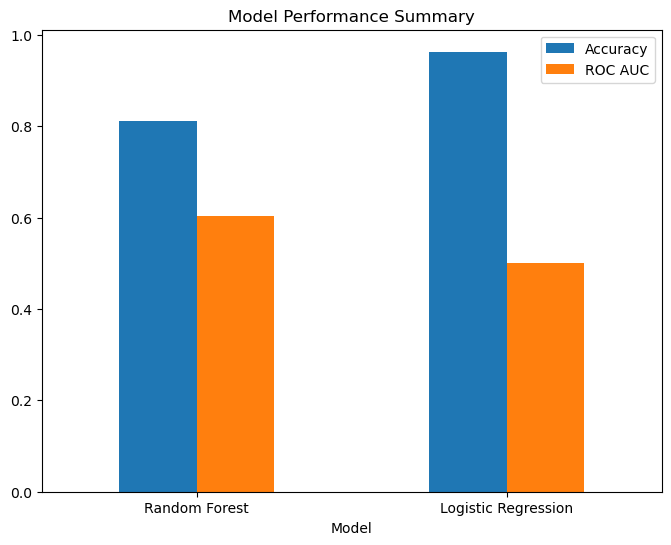

In [ ]:
summary = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [
        classification_report(y_test, y_pred_forest, output_dict=True)['accuracy'],
        classification_report(y_test, test_predictions, output_dict=True)['accuracy']
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_forest),
        roc_auc_score(y_test, test_predictions)
    ]
}
summary_df = pd.DataFrame(summary)
summary_df.plot(kind='bar', x='Model', figsize=(8, 6))
plt.title('Model Performance Summary')
plt.xticks(rotation=0)
plt.show()